# Dictionaries

### Key / Value Pairs

Also referred to as:
* Associative Arrays - Perl/PHP
* Properties or Map or HashMap - Java
* Property Bag - C# / .Net
* Seems to also be referred to as a "hash table" or "lookup table" as well

### Considerations and/or Possible Drawbacks:
* Not great for ordered/sorted data --> Consider the `collections.OrderedDict` library instead

* Python dictionaries have a continuous blocks of memory like lists

* In Python, like lists, dictionaries are allocated dynamic memory slots (initially 8) as the dictionary grows closer to certain sizes
* Uses `hash()` function to create a unique hash for each unique key
    * In order to avoid same hash collision, Python [implements dictionaries](https://github.com/python/cpython/blob/main/Objects/dictobject.c) with [open addressing](https://en.wikipedia.org/wiki/Open_addressing), which allows the dictionary to find an alternative location for colliding key
        * Also called "probing" --> this is why dictionary items are not ordered when you iterate over them
            * There is a particular [formula](http://www.laurentluce.com/posts/python-dictionary-implementation/)/procedure that has been implemented to find an alternative spot
        * Another way to resolve hash collisions is "chaining": basically have the keys with the same hash be "chained" together as a linked list
            * HOWEVER, may result in O(n) time complexity depending on the number of collisions
    * Immutable data types such as integers, strings, objects, etc. are hashable
        * Mutable data types such as lists, sets, dictionaries, etc are NOT hashable
        * You can make class objects unhashable but including the following attribute within the class: `__hash__ = None`
* The position (index) for each key/value pair along with its hash is referred to as a "bucket"
* May or may not be synchronized (or, it may not be safe for multi-threading and it won't allow one null key nor multiple null values)
* __Time Complexity:__ Average --> O(1), Worst --> O(n)

<br>

More resources regarding the implementation of Python dictionaries:
* [StackOverflow Comment 1](https://stackoverflow.com/a/9022835/19047774)
* [StackOverflow Comment 2](https://stackoverflow.com/a/21595149/19047774)

**************

Extremely basic (and not very efficient) implementation of how a dictionary kind of works on the back end:
* Note: For this particular implementation, we are:
    * a) hashing using the ASCII version of the passed in key (using `ord()`)
    * b) adding up all of the ASCII values for each character in a key ('h' in this instance)
    * c) performing a modulus operation with the ASCII sum and the maximum size of the array of key/value pairs
* This implementation is more likely to be susceptible to same hash collisions
* Alternatively, Python offers the `hash()` function

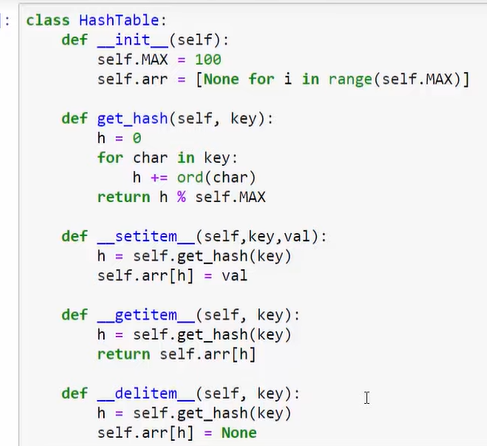

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/hash-table-simple-implementation.png")

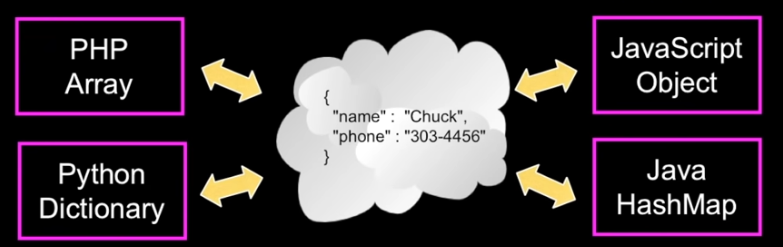

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/dictionaries.png")

In [ ]:
# Dictionary literal (constants)
us_states = {
    "California": "2.5 sqft house going for $3,500 a month (limited time offer!)",
    "Texas": "oil, yeehaw, what more can I say",
    "Ohio": "no comment",
    "Florida": "Breaking News: Florida Man and local neighborhood aligator team up to rob a UPS store"
}

print(us_states)
print(us_states["California"])

{'California': '2.5 sqft house going for $3,500 a month (limited time offer!)', 'Texas': 'oil, yeehaw, what more can I say', 'Ohio': 'no comment', 'Florida': 'Breaking News: Florida Man and local neighborhood aligator team up to rob a UPS store'}
2.5 sqft house going for $3,500 a month (limited time offer!)


Another way to add new items to an already declared dictionary:

In [1]:
peanut_butter = dict()

peanut_butter.update({"do you like peanut butter": "yes"})

print(peanut_butter)

{'do you like peanut butter': 'yes'}


In [ ]:
#loop through dictionary

for key, value in us_states.items():
    print(key, '-', value)

California - 2.5 sqft house going for $3,500 a month (limited time offer!)
Texas - oil, yeehaw, what more can I say
Ohio - no comment
Florida - Breaking News: Florida Man and local neighborhood aligator team up to rob a UPS store


In [1]:
expenses = dict() # can also initialize this way: expenses = {}

expenses['rent'] = 1200
expenses['groceries'] = 200
expenses['hamburger'] = 500
expenses['electricity'] = 80

In [2]:
print(expenses)

{'rent': 1200, 'groceries': 200, 'hamburger': 500, 'electricity': 80}


In [3]:
print(expenses['hamburger'])

500


In [4]:
# MUTABLE
expenses['rent'] = expenses['rent'] + 1100

In [5]:
print(expenses)

{'rent': 2300, 'groceries': 200, 'hamburger': 500, 'electricity': 80}


## Lists vs Dictionaries

Similar, but indexing & order is a little different

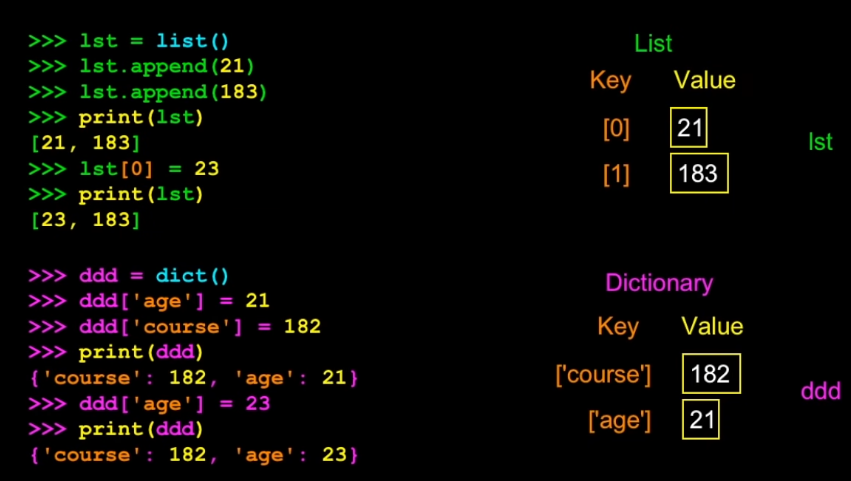

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/lists-vs-dictionaries.png")

## Counting & Histograms

In [8]:
counts = dict()

names = ['csev', 'cwen', 'bob', 'refrigerator', 'priscilla', 'amy', 'staples', 'cwen', 'staples', 'priscilla', 'cwen', 'staples']

for name in names:
    if name not in counts:
        counts[name] = 1
    else:
        counts[name] = counts[name] + 1

print(counts)

{'csev': 1, 'cwen': 3, 'bob': 1, 'refrigerator': 1, 'priscilla': 2, 'amy': 1, 'staples': 3}


Simpler version of above, using get():

In [11]:
counts = dict()

names = ['csev', 'cwen', 'bob', 'refrigerator', 'priscilla', 'amy', 'staples', 'cwen', 'staples', 'priscilla', 'cwen', 'staples']

for name in names:
    counts[name] = counts.get(name, 0) + 1  #allows for creating new entries & updating existing entries

print(counts)

{'csev': 1, 'cwen': 3, 'bob': 1, 'refrigerator': 1, 'priscilla': 2, 'amy': 1, 'staples': 3}


### Counting Frequency of Words in Text

Main Idea -- for each word/iteration in list (words):
    
    1) Append new word to dictionary with the value of 0, or 
    
    2) add 1 to the value for each iteration where that word already exists in the dictionary

In [2]:
counts = dict()
line = input('Enter a line of text: ') # reads most recent keyboard input; similar to Java's next()

# based on each white space, splits each word within text into multiple items in a list
words = line.split()

print('Words:', words)

print('Counting...')

for word in words:
    # get(keyname, value)
    counts[word] = counts.get(word, 0) + 1

print('Counts', counts)

Words: ['Attention', 'if', 'you', 'or', 'a', 'loved', 'one', 'was', 'diagnosed', 'with', 'mesothelioma', 'you', 'may', 'be', 'entitled', 'to', 'financial', 'compensation.', 'I', 'have', 'an', 'annuity', 'but', 'I', 'need', 'cash', 'now,', 'call', 'JG', 'Wentworth', '877-CASH-NOW.']
Counting...
Counts {'Attention': 1, 'if': 1, 'you': 2, 'or': 1, 'a': 1, 'loved': 1, 'one': 1, 'was': 1, 'diagnosed': 1, 'with': 1, 'mesothelioma': 1, 'may': 1, 'be': 1, 'entitled': 1, 'to': 1, 'financial': 1, 'compensation.': 1, 'I': 2, 'have': 1, 'an': 1, 'annuity': 1, 'but': 1, 'need': 1, 'cash': 1, 'now,': 1, 'call': 1, 'JG': 1, 'Wentworth': 1, '877-CASH-NOW.': 1}


## Definite Loops and Dictionaries

In [3]:
people = {
    'bob' : 17,
    'amy' : 36,
    'priscilla' : 24,
    'squidward' : 135,
    'queen elizabeth' : 7234
}

#prints keys instead of index numbers
for key in people:
    print(key, people[key])

bob 17
amy 36
priscilla 24
squidward 135
queen elizabeth 7234


Can get a list of keys, values, or both (items) from dictionary:

In [4]:
print(list(people))

['bob', 'amy', 'priscilla', 'squidward', 'queen elizabeth']


In [8]:
# order is same as below
print(people.keys())

dict_keys(['bob', 'amy', 'priscilla', 'squidward', 'queen elizabeth'])


In [6]:
# order is same as above
print(people.values())

dict_values([17, 36, 24, 135, 7234])


In [7]:
# TUPLE
print(people.items())

dict_items([('bob', 17), ('amy', 36), ('priscilla', 24), ('squidward', 135), ('queen elizabeth', 7234)])


Another way to loop through dictionary:

In [9]:
for key, val in people.items():
    print(key, val)

bob 17
amy 36
priscilla 24
squidward 135
queen elizabeth 7234


## Min, Max, & Sorting Dictionaries

using `zip()`: converting dictionary into a single list consisting of tuples of each key/value pair

*Note: When using aggregate functions (min, max, sorted), don't assign zip function to a variable, for some reason can result in an "empty sequence" error. Use zip function as is*

In [9]:
grocery_items = {
    'rice': 5.99,
    'bread': 2.99,
    'peanut butter': 59.97,
    'applesauce': 1.99,
    'entire state of delaware': 0.89
}

### Min():

In [11]:
print("Lowest priced grocery item:", min(zip(grocery_items.values(), grocery_items.keys())))


Lowest priced grocery item: (0.89, 'entire state of delaware')


### Max():

In [12]:
print("Highest priced grocery item:", max(zip(grocery_items.values(), grocery_items.keys())))

Highest priced grocery item: (59.97, 'peanut butter')


### Sorted():

In [13]:
print("Grocery items, priced lowest to highest:", sorted(zip(grocery_items.values(), grocery_items.keys())))

Grocery items, priced lowest to highest: [(0.89, 'entire state of delaware'), (1.99, 'applesauce'), (2.99, 'bread'), (5.99, 'rice'), (59.97, 'peanut butter')]
